In [ ]:
#Analyse Exploratoire

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset nettoyé
df = pd.read_csv("../data/full_data_flightdelay.csv")

# On prend 100 000 lignes au hasard
df_sample = df.sample(n=100000, random_state=42)

df_sample.head()

In [ ]:
#Réepartition des vols en retard par heure

plt.figure(figsize=(5,5))
df['DEP_DEL15'].value_counts().plot.pie(autopct='%1.1f%%', labels=['On Time', 'Delayed'], colors=['grey', 'red'])
plt.title('Répartition des vols retardés')
plt.ylabel('')
plt.show()

In [ ]:
#Rétard par mois

plt.figure(figsize=(10,5))
sns.countplot(data=df_sample, x='MONTH', hue='DEP_DEL15', palette='Set2')

plt.title('Retards par mois')
plt.xlabel('mois')
plt.ylabel('Nombre de vols')
plt.legend(['A lheurs','Retardé'])
plt.show()

In [ ]:
#Retards de vol par jours de la semaine

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='DAY_OF_WEEK', hue='DEP_DEL15', palette='Set1')
plt.title('Retards par jour de la semaine')
plt.xlabel('Jour de la semaine (1=Lundi, 7=Dimanche)')
plt.ylabel('Nombre de vols')
plt.legend(['À l’heure', 'Retardé'])
plt.show()

In [ ]:
#Retards par compagnie aérienne

plt.figure(figsize=(12,6))
df.groupby('CARRIER_NAME')['DEP_DEL15'].mean().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Taux moyen de retard par compagnie aérienne')
plt.ylabel('Taux de retard (%)')
plt.show()

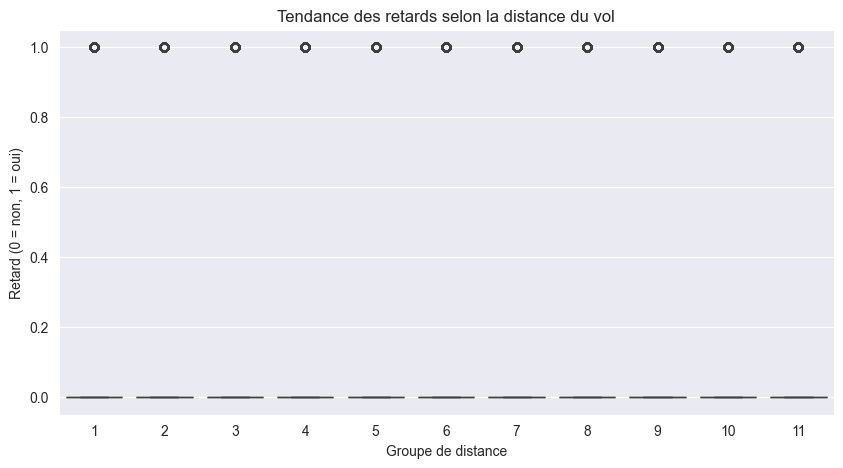

In [33]:
# Retards selon la distance

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='DISTANCE_GROUP', y='DEP_DEL15')
plt.title('Tendance des retards selon la distance du vol')
plt.xlabel('Groupe de distance')
plt.ylabel('Retard (0 = non, 1 = oui)')
plt.show()